In [148]:
import numpy as np
from scipy import linalg as lin
import scipy as sci
import math 
import matplotlib.pyplot as plt
from sympy import *
import time
from scipy import interpolate

# Interpolação


# 1)

$$f(t) = \frac{1}{1+25 t^2}$$

**Intervalo:** $[-1, 1]$

a) Implemente a interpolação  de Lagrange e de Newton

In [41]:
# Lagrange
def lagrange_interp(xi, yi, x):
    n = np.size(xi); 
    m = np.size(x); 
    
    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:] * (x - xi[j])) / (xi[i] - xi[j]);

    y = yi.dot(L);
    return y;

# Newton

def newton_interp(xi,yi,x):
    n = np.size(xi); ni = np.size(x); N = np.ones((n,ni));
    D = np.zeros((n,n)); D[:,0] = yi;
    
    for j in np.arange(n - 1):
        for i in np.arange(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xi[i + j + 1]- xi[i]);

    for i in np.arange(1, n):
        N[i,:] = N[i-1,:] * (x - xi[i - 1]);
    
    y = D[0,:].dot(N)
    
    return y


def plot(x, y, labelName):
    plt.figure(figsize=(10,6),facecolor='white')
    plt.grid()
    
    plt.scatter(x,yi,label = 'Pontos',linewidth = 2) 

    plt.plot(x,y,label = labelName,linewidth = 2)
    
    
    plt.xlabel('x',fontsize='large') 
    plt.ylabel('y',fontsize='large') 
    plt.title('') 
    plt.legend() 
    plt.show()

b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e
Newton com o código implementado no item anterior.

----------------Newton------------


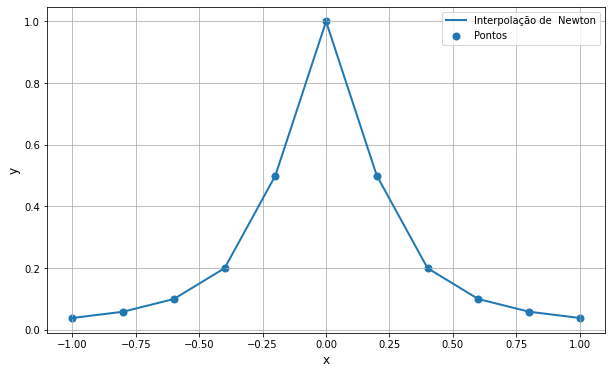

----------------Lagrange------------


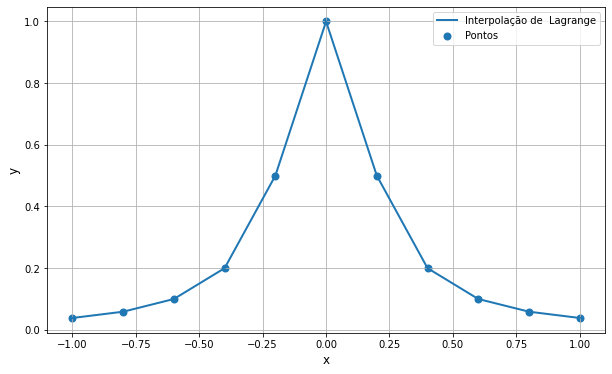

In [45]:
x = np.linspace(-1, 1, num=11, endpoint=True)
yi = (lambda x: 1 / (1 + 25*x**2))(x);


print("----------------Newton------------")
y = newton_interp(x,yi,x)
plot(x, y, "Interpolação de  Newton")


print("----------------Lagrange------------")
y = lagrange_interp(xi,yi,x)
plot(x, y, "Interpolação de  Lagrange")


c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.


----------------Newton------------


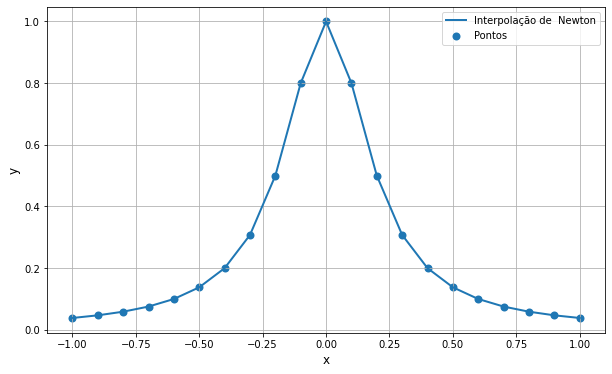

----------------Lagrange------------


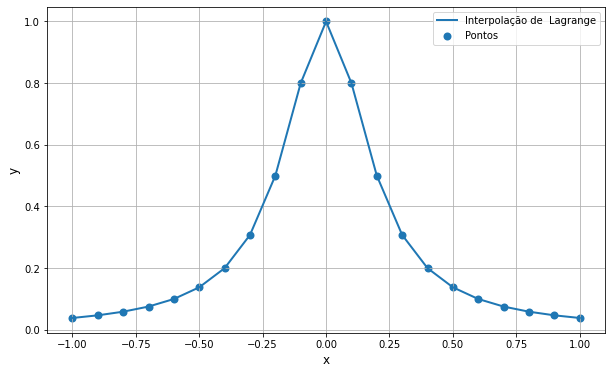

In [46]:
x = np.linspace(-1, 1, num=21, endpoint=True)
yi = (lambda x: 1 / (1 + 25*x**2))(x);


print("----------------Newton------------")
y = newton_interp(x,yi,x)
plot(x, y, "Interpolação de  Newton")


print("----------------Lagrange------------")
y = lagrange_interp(x,yi,x)
plot(x, y, "Interpolação de  Lagrange")

d) Usando a função scipy.interpolate.interp1d calcule a interpolação usando spline linear e cúbica. Exiba
os gráficos e comente as diferençaas das soluções deste item para os anteriores.


----------------Spline Linear------------


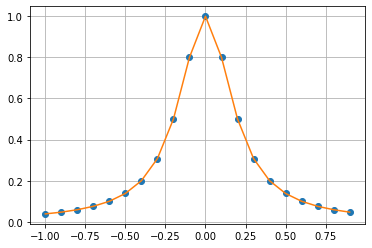

In [71]:
print("----------------Spline Linear------------")
x = np.arange(-1, 1, .1)
y =  1 / (1 + 25*x**2)
f = interpolate.interp1d(x, y)

xnew = np.arange(-1, 1, .1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.grid()
plt.show()
plt.close()

# 2)

Um experimento produziu o conjunto de dados apresentado na tabela 4. Deseja-se interpolaresses dados com uma curva suave para que possa obter valores razo´aveis de y para valores de t entre os pontos em que as medidas foram tiradas.

In [130]:
t = np.array([0., .5, 1., 6., 7., 9.], dtype="double")
y = np.array([0., 1.6, 2.0, 2.0, 1.5, 0.], dtype="double")

----------------Newton------------


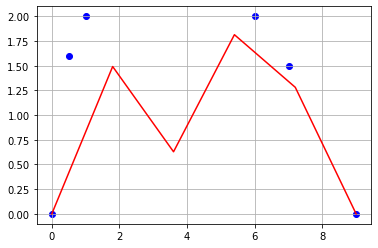

----------------Lagrange------------


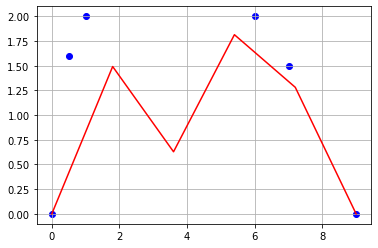

In [141]:
x = np.linspace(0, 9, num=6)
# yi = (lambda x: 1 / (1 + 25*x**2))(x);


print("----------------Newton------------")
y1 = newton_interp(t,y,x)
plt.plot(x, y1, color="red")
plt.scatter(t, y, color="blue")
plt.grid()
plt.show()
plt.close()

print("----------------Lagrange------------")
y2 = lagrange_interp(t,y,x)
# plot(x, y2, "Interpolação de  Lagrange")
y1 = newton_interp(t,y,x)
plt.plot(x, y2, color="red", label="Lagrange")
plt.scatter(t, y, color="blue")
plt.grid()
plt.show()
plt.close()

c) Com Splines cúbicas


----------------Spline Linear------------


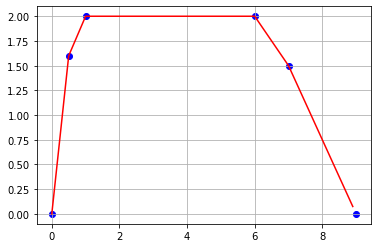

In [115]:
print("----------------Spline Linear------------")

f = interpolate.interp1d(t, y)

xnew = np.arange(0, 9, .1)
ynew = f(xnew)   

plt.plot(xnew, ynew, color="red")
plt.scatter(t, y, color="blue")
plt.grid()
plt.show()
plt.close()

# 3) 

In [143]:
t = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64], dtype="double")
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype="double")

----------------Newton------------


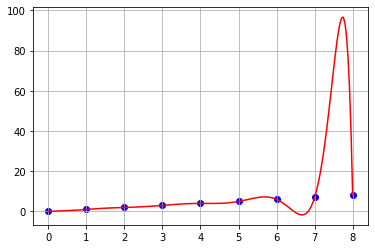

----------------Lagrange------------


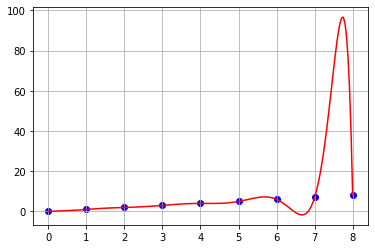

In [158]:
x = np.linspace(0, 64, num=100)
# yi = (lambda x: 1 / (1 + 25*x**2))(x);


print("----------------Newton------------")
y1 = newton_interp(t,y,x)
plt.plot( np.sqrt(x), y1, color="red")
plt.scatter(np.sqrt(t), y, color="blue")
plt.grid()
plt.show()
plt.close()

print("----------------Lagrange------------")
y2 = lagrange_interp(t,y,x)
# plot(x, y2, "Interpolação de  Lagrange")
y1 = newton_interp(t,y,x)
plt.plot( np.sqrt(x), y2, color="red")
plt.scatter(np.sqrt(t), y, color="blue")
plt.grid()
plt.show()
plt.close()

----------------Spline Linear------------


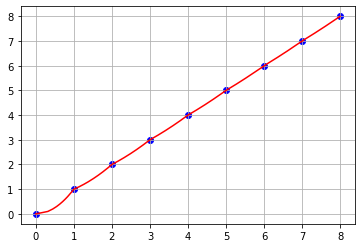

In [157]:
print("----------------Spline Linear------------")

f = interpolate.interp1d(t, y)

xnew = np.arange(0, 64, .1)
ynew = f(xnew)   

plt.plot(np.sqrt(xnew), ynew, color="red")
plt.scatter(np.sqrt(t), y, color="blue")
plt.grid()
plt.show()
plt.close()

# Mínimos  Quadrados

## 1)

In [163]:
t =  np.array([0, 1, 2, 3, 4, 5], dtype="double")
y =  np.array([1, 2.7, 5.8, 6.6, 7.5, 9.9], dtype="double")


A = np.vstack([t, np.ones(len(t))]).T

In [169]:
X = np.linalg.lstsq(A, y, rcond = 2)
print (X[0])

[1.70571429 1.31904762]


In [171]:
## 2)

In [174]:
A = np.array(
        [[0.16, .1],
         [0.17, .11],
         [2.02, 1.28]], dtype="double")

y = np.array([0.26, .28, 3.31], dtype="double")


In [177]:
## a) 

X = np.linalg.lstsq(A, y, rcond = -1)
print (X[0])

[  8.55177112 -10.89509537]


In [178]:
y = np.array([0.27, .25, 3.33], dtype="double")
X = np.linalg.lstsq(A, y, rcond = -1)
print (X[0])

[  8.55177112 -10.89509537]



## 3)

$$a y^2+ bx y + c x + d y + e = x^2$$

In [204]:
A = np.array(
        [1.02, .98, .87, .77, .67, .56, .44, .3, .16, .01],
         dtype="double")

A1 = np.vstack([A, np.ones(len(A))]).T

yi = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15], dtype="double")

X = np.linalg.lstsq(A1, yi, rcond = -1)
print(X[2])

2


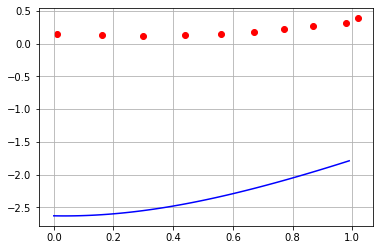

In [223]:
a = X[0][0]
b = X[0][1]
c = X[1][0]
d = X[2]
e = X[3][0]

x = np.arange(0, 1, .01)
y = (lambda x: (np.sqrt((b * x + d**2) - 4 * a * (c * x + e - x**2)) - b * x - d)/ (2 * a))(x)

plt.scatter(A, yi, color="red")
plt.plot(x, y, color="blue")
plt.grid()